# Gradient Descent

It is a generic optimatization algorithm which is capable of finding the optimal soultion to a wide range of problems. 
The general idea of a Gradient Descent is to tweak the parameters iteratively in order to minimize a cost function.

---

## Preparing the data which can be used later

In [1]:
import numpy as np  # Importing Library
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) 
X_new = np.array([[0], [2]])

Visualizing the data

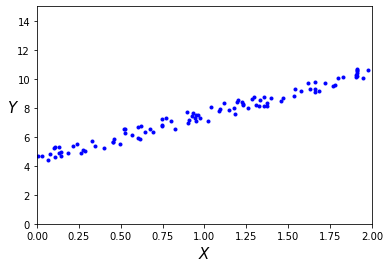

In [2]:
import matplotlib.pyplot as plt  # Importing Library
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", rotation=0, fontsize=15)
plt.axis([0, 2, 0, 15])
plt.show()

---

## Applying Linear Regression as a base standard

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficient: {lin_reg.coef_}')

print('Prediction')
print(lin_reg.predict(X_new))

Intercept: [4.50560009]
Coefficient: [[2.99583004]]
Prediction
[[ 4.50560009]
 [10.49726017]]


---

## General Process of Gradient Descent

- We start at a random value, this is called **Random Initialization**
- Then we calculate the cost function (eg. MSE) for that value
- We then move slowly to the next value where the cost function is decreasing
    - The steps by which we move is determined by the **Learning Rate** hyperparameter
- Repeating the above steps will eventually result in the most optimized value

## Things to remember about Gradient Descent Algorithm
- Make sure all the features have a similar scale or else it will take much longer to converge on to the optimal solution

---

## Types of Gradient Descent Algorithm

- Batch Gradient Descent
- Stochstic Gradient Descent
- Mini Batch Gradient Descent

### Batch Gradient Descent:
- It uses the whole batch of training data at every step
- As a result it is very slow on large training sets
- But it scales very well with the number of features
- Comparing a Linear Regression model where there are hundreds of features, Batch Gradient Descent is much faster than the Normal Equation or the SVD decomposition 

### Stochastic Gradient Descent:
- Instead of using the entire batch of training data every time, this picks a random instance in a training set and computes the gradients based only on that single instance
- As a result, this is much faster and it also makes it possible to train on huge training sets since only one instance needs to be in the memory
- Due to its stochastic nature, the algorithm is much less regular; instead of gently decreasing, the cost function keeps bouncing and decreasing only on average
- Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around and never settle down. So once the algorithm stops, the solution is good but not optimal
- The randomness is good to escape any local minimum, but bad since it means that the algorithm will never settle at the minimum
- Solution to the above problem, is to reduce the learning rate of the model so that in the beginning it's high enough to jump out of local minimum but as it progress the learning rate is reduced to reach the optimal solution
- The function that determines the learning rate at each iteration is called *Learnign Schedule*
- If the learning rate is reduced too quickly then you may end up on a sub-optimal solution, whereas if the learning rate is reduced too slowly then you will end up jumping around the optimal solution for quite a while
- Another approach is to run the code until the loss drop of the cost function is not less than a certain value called *Tolerance*

#### Performing Linear Regression using Stochastic Gradient Descent approach:

The following code applies Stochastic Gradient Regressor, which runs for a maximum of 1000 epochs *(iterations)*, or untill the loss drops by less than 0.001 during one epoch *(tolerance)*. It starts with a learning rate of 0.1 *(eta0)*, using the default learning schedule. It doesn't use any type of regularization *(penalty)*.

In [4]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,
                      tol=1e-3,
                      eta0=0.1,
                      penalty="none")
sgd_reg.fit(X, y.ravel())  #ravel returns a 1D array
print(f'Intercept: {sgd_reg.intercept_}')
print(f'Coefficient: {sgd_reg.coef_}')

print('\nPredictions')
print(sgd_reg.predict(X_new))

Intercept: [4.49888819]
Coefficient: [3.00451325]

Predictions
[ 4.49888819 10.5079147 ]


As we can see that the solution is quite close to the Linear Regression Model

### Mini-batch Gradient Descent:

- It combines both Batch and Stochastic Gradient Descent algorithms
- At each step, instead of comuting the gradients based on a single instance of the training set *(Stochastic Gradient Descent)* or based on the full training set *(Batch Gradient Descent)*, it computes based on a small random set of the training set called *Mini Batches*
- Main advantage:
    - Performance gain over the Batch Gradient Descent algorithm
    - Less eratic than the Stochastic Gradient Descent algorithm
- It will get closer to the optimal solution, but it may be harder for it to escape the local minimum due to less eratic behavior 

---

## Comparisor of algorithms for Linear Regression

|Algorithm|Large *m*|Out-of-core support|Large *n*|Hyperparameters|Scalling required|Scikit-Learn|
|---|---|---|---|---|---|---|
|Normal Equation|Fast|No|Slow|0|No|N/A|
|SVD|Fast|No|Slow|0|No|`LinearRegression`|
|Batch GD|Slow|No|Fast|2|Yes|`SGDRegressor`|
|Stochastic GD|Fast|Yes|Fast|>=2|Yes|`SGDRegressor`|
|Mini-batch GD|Fast|Yes|Fast|>=2|Yes|`SGDRegressor`|

---

## General Terms

- **Random Initialization**
    - Starting the Gradient Descent Algorithm at a random initial value
- **Learning Rate**
    - Size of the step by which the algorithm moves to the next step of its evaluation
    - If the learning rate is too low, then it will take too long for the algorithm to converge on the most optimal souliton
    - If the learning rate is too high, then the algorithm will bounce around and not settle on the most optimal solution
    - In order to find a good learning rate, we can use `Grid Search`
- **Local Minimum**
    - In cases where the cost function isn't a regular bowl shaped, there could be a point which is the most optimal solution since there could be some sort of holes, ridges, plateaus or irregular terrain
- **Global Minimum**
    - This is the most optimal solution in case a local minimum is present
- **Convex Function**
    - A function where if you pick any two points on the curve, the line joining them never crosses the curve. This imples that there are no local minimum, just one global minimum
    - MSE function of a Linear Regression is a convex function, so a gradient descent approach on a linear regression is gaunranteed to reach the global minimum
- **Epoch**
    - Iterations of the model
- **Learning Schedule**
    - The function that determines the learnign rate of the model
    - If the learning rate is reduced too quickly then we may end up on a sub-optimal solution
    - If the learning rate is reduced too slowly then we will end up jumping around the optimal solution for too long
- **Tolerance**
    - The threshold of the loss drop for a cost function during one epoch which determines if we need to stop the code
    - Useful in cases where we are not sure about how long we need to run a particular model

---

## Credits
- Complete credit goes to Hands-on Machine Learning  with  Scikit-Learn, Keras & TensorFlow book by Aurélien Géron
- This notebook is my understanding of the topic